In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, sys, lzma, os

datadir = 'data'

sys.path.insert(0,'C:/git/StrathLab/libs') #Lab PC
sys.path.insert(0,'D:/Repositories/StrathLab/libs') #XMG
import StrathLabToolkit as lab
datadir_full = os.path.join(os.getcwd(),datadir)

Found 24 datafiles in: C:\Users\Antonio\Desktop\Matej\22-08-08_RTD-OSC_spiking\data
KEY                       LEVEL           TYPE      
-------------------------------------------------------------------------------
date                      0               <str>: 2022/08/08, 15:30:00
fname                     0               <str>: 001_UpwPulse_Valley
modulation                0               <objdict> 
  ch1_type                1               <str>: dac
  ch1_voltage             1               <float>: 0.1
  ch2_amp                 1               <int>: 1  
  ch2_doublet_locations_A_sa 1               <list>    
  ch2_doublet_locations_B_sa 1               <list>    
  ch2_pulse_len_sa        1               <ndarray> 
  ch2_separator           1               <float>: 5e-07
  ch2_type                1               <str>: dac
  ch2_voltage             1               <float>: 0.1
  samplerate              1               <float>: 1000000000.0
  wf1_xpar                1         

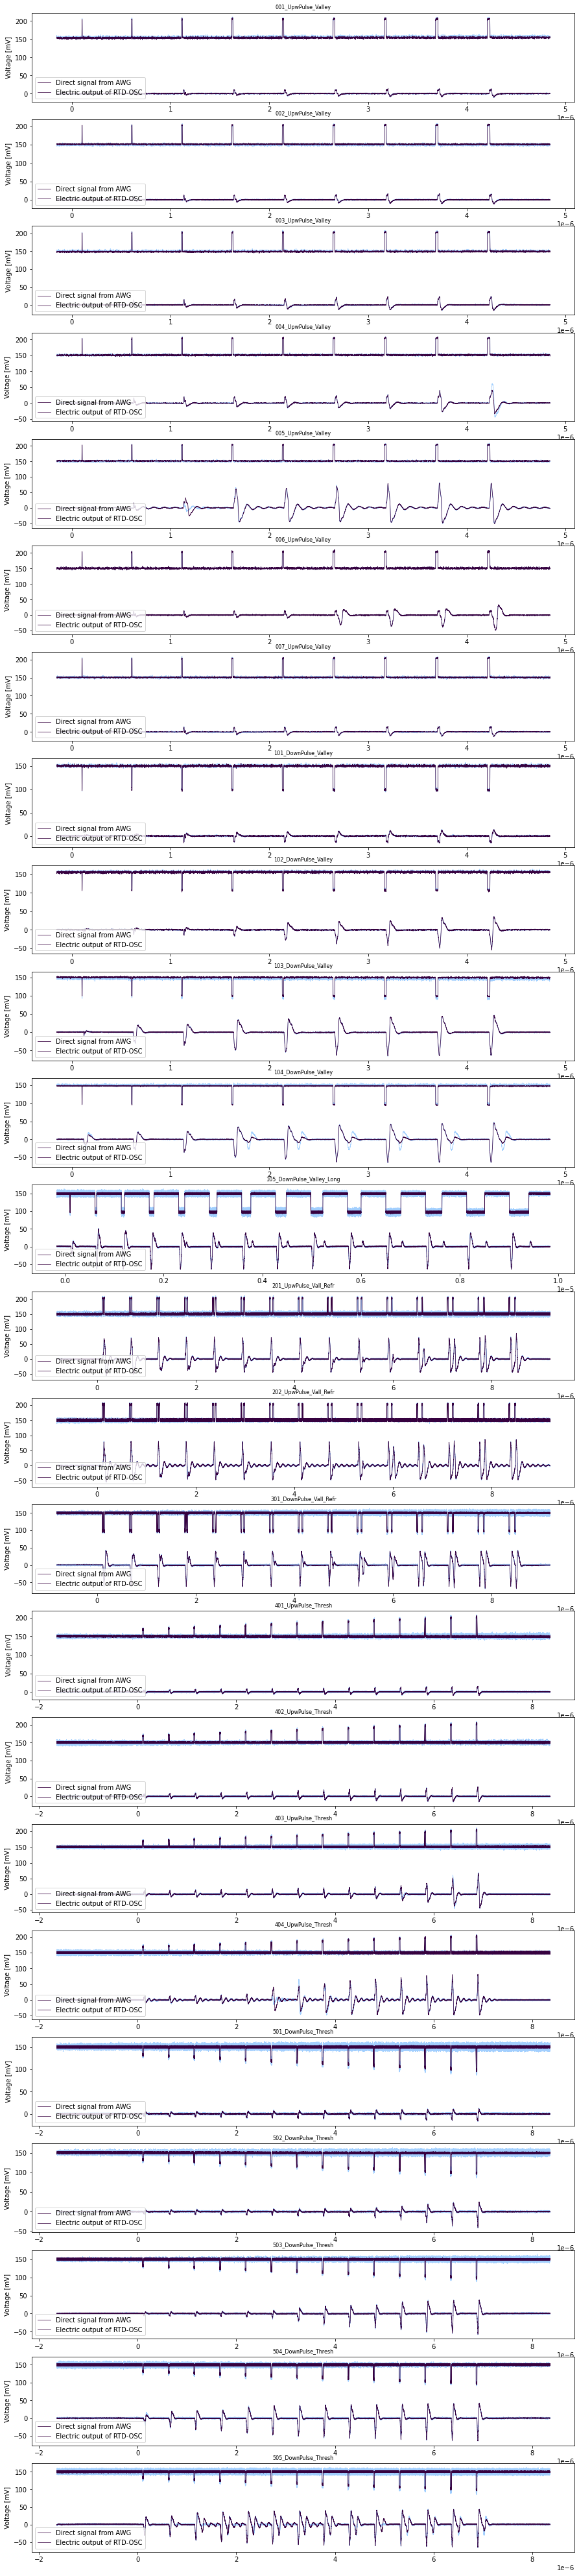

In [11]:
## Visualize contents of a recorded measurement datafiles
lookup = '0' ##

######
datafiles = lab.Get_Files_From_Dir(datadir_full)
datafiles = [entry for entry in datafiles if '.pkl.lz' in entry] 
dfile_count=len(datafiles)
print(f'Found {dfile_count} datafiles in: {datadir_full}')

###### Inspect contents of datafile
#with lzma.open((os.path.join(datadir_full,datafiles[0])),"rb") as f:
#    data = pickle.load(f)
#    lab.Visualise_Data_Dict(data)
######

if dfile_count<2:
    fig,ax = plt.subplots(2,1,figsize=(15,6),gridspec_kw={'height_ratios':(1,0.25)})
else:
    fig,ax = plt.subplots(dfile_count,1,figsize=(15,dfile_count*3))
    
ii=0
for dfile in datafiles:
    if lookup in dfile:
        with lzma.open((os.path.join(datadir_full,dfile)),"rb") as f:
            data = pickle.load(f)
            #data.contents()

            for ic in range(data.readout_osc_count):
                ax[ii].plot(np.linspace(*data[f'readout_osc_{ic}'].xpar),np.asarray(data[f'readout_osc_{ic}']['y0'])*1e3,lw=0.75,color='xkcd:baby blue')
                ax[ii].plot(np.linspace(*data[f'readout_osc_{ic}'].xpar),
                            data[f'readout_osc_{ic}'].ymean*1e3,
                            lw=0.75,color='xkcd:deep purple',label=data[f'readout_osc_{ic}'].description)
                ax[ii].set_title(dfile[12:-7],fontsize=8)
            ax[ii].legend(loc='lower left')
            ax[ii].set_ylabel('Voltage [mV]')
            ii=ii+1